In [1]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *
from tabulate import tabulate

In [2]:
adj_mat = pd.read_csv(ConnFil, index_col=0)
g = LoadConnectome2(adj_mat) # Load Connectiome
EdgeWeightsDict = EdgeDict(g, keyon="label")
str2reg = STR2Region()
#str2reg_df = pd.read_csv(MajorBrainDivisions, delimiter="\t")

In [3]:
Sib_Bias_avgz = pd.read_csv("dat/bias2/ASD.Siblings.spec.bias.csv", index_col="STR") # dat/bias2/ASD_LGD_Dmis2_spec.bias.csv
Sib_Bias_avgz = pd.read_csv("dat/bias2/ASD_LGD_Dmis2_spec.bias.csv", index_col="STR")
SparkMetaBias = pd.read_csv("dat/Jon_data/Spark_Final_ExpBias.csv")
SparkMetaBias.columns = ["STR", "EFFECT", "Rank", "NGene"]
SparkMetaBias = SparkMetaBias.set_index("STR")

### Annotate Graph and save

In [23]:
def CleanCluster(Clusters, verbose=False):
    Kept, Dropped = [], []
    for cluster in Clusters:
        #print(len(cluster), cluster)
        if len(cluster) < 2:
            Dropped.extend(cluster)
        else:
            Kept.extend(cluster)
            if verbose:
                tabulate(nodeDF.loc[cluster, :])
    return Kept, Dropped
def dd(file, g, Nslices, topN = 50):
    Spark_EWS = pd.read_csv(file, index_col="STR")
    Candidate_CircuitNodes = Spark_EWS.head(50).index.values
    g2 = subgraph(g, Candidate_CircuitNodes)
    dat = []
    for v in g2.vs:
        dat.append([v.index, v["label"], str2reg[v["label"]]])
    nodeDF = pd.DataFrame(dat, columns=["index", "STR", "REG"])
    nodeDF = nodeDF.set_index("index")
    g2.to_undirected()
    xx = g2.community_edge_betweenness()
    
    QScores = []
    Nslices = np.arange(2,20,1)
    Nkept = []
    for N in Nslices:
        clusters = xx.as_clustering(N)
        Kept, Dropped = CleanCluster(clusters)
        g2_kept = g2.subgraph(Kept)
        Q = g2.modularity(clusters)
        QScores.append(Q)
        Nkept.append(len(Kept))
    return xx, nodeDF, QScores

def PlotMod(Nslices, QScores, idx):
    fig, ax = plt.subplots(dpi=120)
    ax.plot(Nslices, QScores, marker=".", color="black")
    ax.scatter(Nslices[idx], QScores[idx], s=100, marker="*", color="red")
    ax.set_ylabel("Modularity")
    ax.set_xlabel("Number of clusters")
    ax.grid(True)
    plt.show()

In [24]:
SA_Z1 = "dat/bias2/ASD.EW.pLI.z1.csv"
SA_Z2 = "dat/bias2/ASD.EW.pLI.z2.csv"
SA_Z1_NoNeg = "dat/bias2/ASD.EW.pLI.z1.NoNeg.csv"
SA_Z2_NoNeg = "dat/bias2/ASD.EW.pLI.z2.NoNeg.csv"

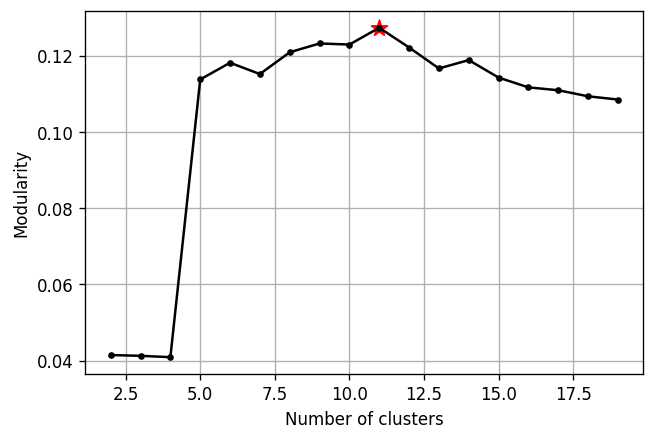

(34, 2)
--  ---------------------------------------  -----------------
 0  Anterior_cingulate_area_dorsal_part      Isocortex
 1  Nucleus_accumbens                        Striatum
 2  Agranular_insular_area_posterior_part    Isocortex
 3  Agranular_insular_area_ventral_part      Isocortex
 4  Accessory_olfactory_bulb                 Olfactory_areas
 5  Anterior_olfactory_nucleus               Olfactory_areas
 7  Basolateral_amygdalar_nucleus            Amygdalar
 9  Bed_nuclei_of_the_stria_terminalis       Pallidum
13  Central_amygdalar_nucleus                Amygdalar
14  Central_lateral_nucleus_of_the_thalamus  Thalamus
15  Claustrum                                Cortical_subplate
16  Caudoputamen                             Striatum
18  Dorsal_peduncular_area                   Olfactory_areas
19  Endopiriform_nucleus_dorsal_part         Cortical_subplate
20  Endopiriform_nucleus_ventral_part        Cortical_subplate
21  Frontal_pole_cerebral_cortex             Isocortex
22  Gustato

In [25]:
Nslices = np.arange(2,20,1)
xx, nodeDF, QScores = dd(SA_Z1, g=g, Nslices=Nslices)
idx = np.argmax(QScores)
PlotMod(Nslices, QScores, idx)

for cluster in xx.as_clustering(idx):
    print(nodeDF.loc[cluster, :].shape)
    print(tabulate(nodeDF.loc[cluster, :]))

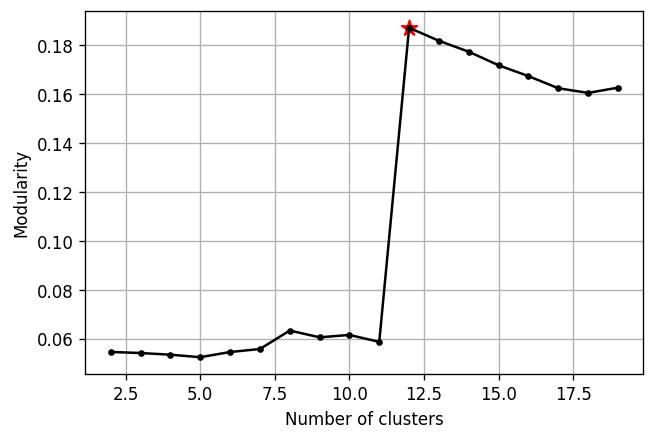

(37, 2)
--  -------------------------------------------------  -----------------
 0  Anterior_cingulate_area_dorsal_part                Isocortex
 1  Nucleus_accumbens                                  Striatum
 2  Agranular_insular_area_posterior_part              Isocortex
 3  Agranular_insular_area_ventral_part                Isocortex
 4  Accessory_olfactory_bulb                           Olfactory_areas
 5  Anterior_olfactory_nucleus                         Olfactory_areas
 7  Basolateral_amygdalar_nucleus                      Amygdalar
 8  Basomedial_amygdalar_nucleus                       Amygdalar
 9  Bed_nuclei_of_the_stria_terminalis                 Pallidum
13  Central_amygdalar_nucleus                          Amygdalar
14  Central_lateral_nucleus_of_the_thalamus            Thalamus
15  Claustrum                                          Cortical_subplate
16  Caudoputamen                                       Striatum
18  Dorsal_peduncular_area                             Olf

In [26]:
Nslices = np.arange(2,20,1)
xx, nodeDF, QScores = dd(SA_Z2, g=g, Nslices=Nslices)
idx = np.argmax(QScores)
PlotMod(Nslices, QScores, idx)

for cluster in xx.as_clustering(idx):
    print(nodeDF.loc[cluster, :].shape)
    print(tabulate(nodeDF.loc[cluster, :]))

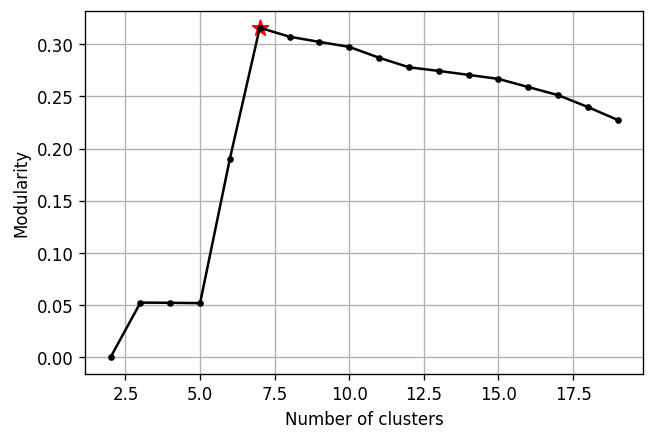

(42, 2)
--  -----------------------------------------  -----------------
 0  Anterior_cingulate_area_dorsal_part        Isocortex
 1  Nucleus_accumbens                          Striatum
 2  Agranular_insular_area_posterior_part      Isocortex
 4  Accessory_olfactory_bulb                   Olfactory_areas
 5  Anterior_olfactory_nucleus                 Olfactory_areas
 6  Anterior_pretectal_nucleus                 Midbrain
 7  Basolateral_amygdalar_nucleus              Amygdalar
 8  Basomedial_amygdalar_nucleus               Amygdalar
12  Central_lateral_nucleus_of_the_thalamus    Thalamus
13  Claustrum                                  Cortical_subplate
14  Caudoputamen                               Striatum
15  Superior_central_nucleus_raphe             Pons
17  Dorsal_peduncular_area                     Olfactory_areas
18  Endopiriform_nucleus_dorsal_part           Cortical_subplate
19  Frontal_pole_cerebral_cortex               Isocortex
20  Intercalated_amygdalar_nucleus             

In [27]:
Nslices = np.arange(2,20,1)
xx, nodeDF, QScores = dd(SA_Z1_NoNeg, g=g, Nslices=Nslices)
idx = np.argmax(QScores)
PlotMod(Nslices, QScores, idx)

for cluster in xx.as_clustering(idx):
    print(nodeDF.loc[cluster, :].shape)
    print(tabulate(nodeDF.loc[cluster, :]))

2


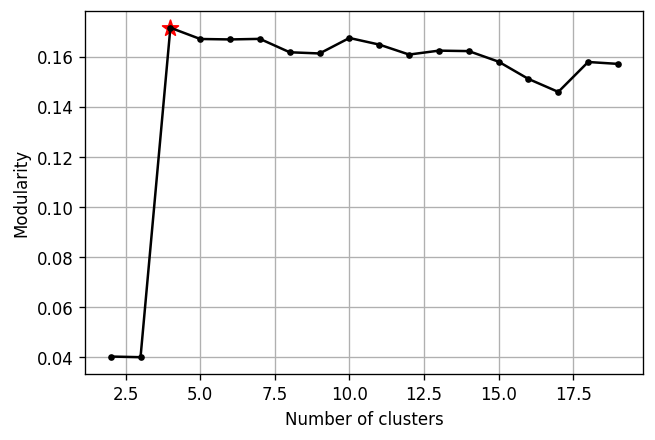

(46, 2)
--  -------------------------------------------------  -----------------
 0  Anterior_cingulate_area_dorsal_part                Isocortex
 1  Nucleus_accumbens                                  Striatum
 2  Agranular_insular_area_posterior_part              Isocortex
 3  Accessory_olfactory_bulb                           Olfactory_areas
 4  Anterior_olfactory_nucleus                         Olfactory_areas
 5  Anterior_pretectal_nucleus                         Midbrain
 6  Basolateral_amygdalar_nucleus                      Amygdalar
 7  Basomedial_amygdalar_nucleus                       Amygdalar
11  Claustrum                                          Cortical_subplate
12  Superior_central_nucleus_raphe                     Pons
14  Dorsal_peduncular_area                             Olfactory_areas
15  Endopiriform_nucleus_dorsal_part                   Cortical_subplate
16  Endopiriform_nucleus_ventral_part                  Cortical_subplate
17  Frontal_pole_cerebral_cortex       

In [41]:
Nslices = np.arange(2,20,1)
xx, nodeDF, QScores = dd(SA_Z2_NoNeg, g=g, Nslices=Nslices)
idx = np.argmax(QScores)
print(idx)
PlotMod(Nslices, QScores, idx)

for cluster in xx.as_clustering(2):
    print(nodeDF.loc[cluster, :].shape)
    print(tabulate(nodeDF.loc[cluster, :]))

### Annotate Graph and save

In [6]:
#Spark_EWS = pd.read_csv("dat/bias2/ASD.EW.pLI.Spec.bias.csv", index_col="STR")
#Spark_EWS = pd.read_csv("dat/bias2/ASD.EW.pLI.NonNeg.Spec.bias.csv", index_col="STR")
Spark_EWS = pd.read_csv("dat/bias2/ASD.EW.pLI.z1.csv", index_col="STR")
#Spark_EWS = pd.read_csv("dat/bias2/ASD.EW.Spec.bias.csv", index_col="STR")
#Spark_EWS = pd.read_csv("dat/jon_data/exprank-asd.csv", index_col="STR")
#Spark_EWS = SparkMetaBias

#Test_STRs = ["Basolateral_amygdalar_nucleus", "Rhomboid_nucleus"]
#Candidate_CircuitNodes = np.append(Spark_EWS.head(45).index.values, Test_STRs)
Candidate_CircuitNodes = Spark_EWS.head(50).index.values# - ["Lateral_visual_area"]
#Candidate_CircuitNodes = [x for x in Spark_EWS.head(50).index.values if x != "Lateral_visual_area"]
##Candidate_CircuitNodes.remove("Lateral_visual_area")
print(len(Candidate_CircuitNodes))
g2 = subgraph(g, Candidate_CircuitNodes)
dat = []
for v in g2.vs:
    dat.append([v.index, v["label"], str2reg[v["label"]]])
nodeDF = pd.DataFrame(dat, columns=["index", "STR", "REG"])
nodeDF = nodeDF.set_index("index")
nodeDF.head(2)

50


,STR,REG
index,,
0,Anterior_cingulate_area_dorsal_part,Isocortex
1,Nucleus_accumbens,Striatum


In [7]:
g2.to_undirected()
xx = g2.community_edge_betweenness()
#for cluster in xx.as_clustering(15):
#    print(nodeDF.loc[cluster, :].shape)
#    print(tabulate(nodeDF.loc[cluster, :]))

In [8]:
for cluster in xx.as_clustering(15):
    print(nodeDF.loc[cluster, :].shape)
    print(tabulate(nodeDF.loc[cluster, :]))

(28, 2)
--  ---------------------------------------  -----------------
 0  Anterior_cingulate_area_dorsal_part      Isocortex
 2  Agranular_insular_area_posterior_part    Isocortex
 3  Agranular_insular_area_ventral_part      Isocortex
 4  Accessory_olfactory_bulb                 Olfactory_areas
 7  Basolateral_amygdalar_nucleus            Amygdalar
13  Central_amygdalar_nucleus                Amygdalar
14  Central_lateral_nucleus_of_the_thalamus  Thalamus
15  Claustrum                                Cortical_subplate
16  Caudoputamen                             Striatum
18  Dorsal_peduncular_area                   Olfactory_areas
19  Endopiriform_nucleus_dorsal_part         Cortical_subplate
21  Frontal_pole_cerebral_cortex             Isocortex
22  Gustatory_areas                          Isocortex
23  Intercalated_amygdalar_nucleus           Amygdalar
24  Infralimbic_area                         Isocortex
28  Mediodorsal_nucleus_of_thalamus          Thalamus
29  Primary_motor_area  

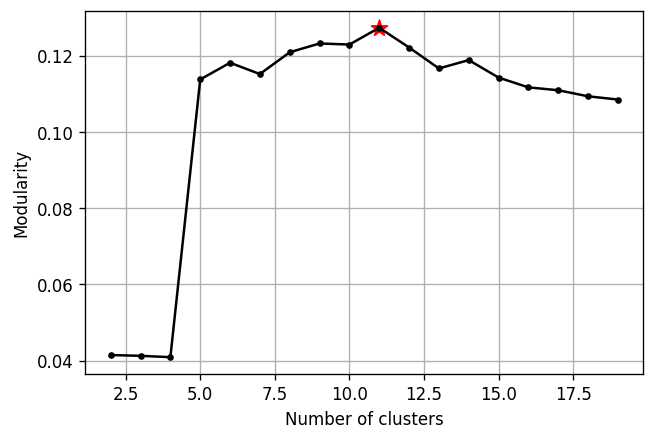

(34, 2)
--  ---------------------------------------  -----------------
 0  Anterior_cingulate_area_dorsal_part      Isocortex
 1  Nucleus_accumbens                        Striatum
 2  Agranular_insular_area_posterior_part    Isocortex
 3  Agranular_insular_area_ventral_part      Isocortex
 4  Accessory_olfactory_bulb                 Olfactory_areas
 5  Anterior_olfactory_nucleus               Olfactory_areas
 7  Basolateral_amygdalar_nucleus            Amygdalar
 9  Bed_nuclei_of_the_stria_terminalis       Pallidum
13  Central_amygdalar_nucleus                Amygdalar
14  Central_lateral_nucleus_of_the_thalamus  Thalamus
15  Claustrum                                Cortical_subplate
16  Caudoputamen                             Striatum
18  Dorsal_peduncular_area                   Olfactory_areas
19  Endopiriform_nucleus_dorsal_part         Cortical_subplate
20  Endopiriform_nucleus_ventral_part        Cortical_subplate
21  Frontal_pole_cerebral_cortex             Isocortex
22  Gustato

In [20]:
Nslices = np.arange(2,20,1)
xx, nodeDF, QScores = dd(SA_Z2, g=g, Nslices=Nslices)
idx = np.argmax(QScores)
PlotMod(Nslices, QScores, idx)

for cluster in xx.as_clustering(idx):
    print(nodeDF.loc[cluster, :].shape)
    print(tabulate(nodeDF.loc[cluster, :]))

In [9]:
def CleanCluster(Clusters, verbose=False):
    Kept, Dropped = [], []
    for cluster in Clusters:
        #print(len(cluster), cluster)
        if len(cluster) < 2:
            Dropped.extend(cluster)
        else:
            Kept.extend(cluster)
            if verbose:
                tabulate(nodeDF.loc[cluster, :])
    return Kept, Dropped


In [10]:
#Cluster_Directed = g2.community_edge_betweenness(directed=True)
#Cluster_UnDirected = g2.community_edge_betweenness(directed=False)

QScores = []
Nslices = np.arange(2,20,1)
Nkept = []
for N in Nslices:
    print(N)
    clusters = xx.as_clustering(N)
    Kept, Dropped = CleanCluster(clusters)
    g2_kept = g2.subgraph(Kept)
    #cohe, Degree = ScoreSTRSet(g2, g2_kept.vs["label"], {}, False, False)
    #print(cohe, Degree)
    Q = g2.modularity(clusters)
    #print(N, len(Kept), Q)
    QScores.append(Q)
    Nkept.append(len(Kept))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


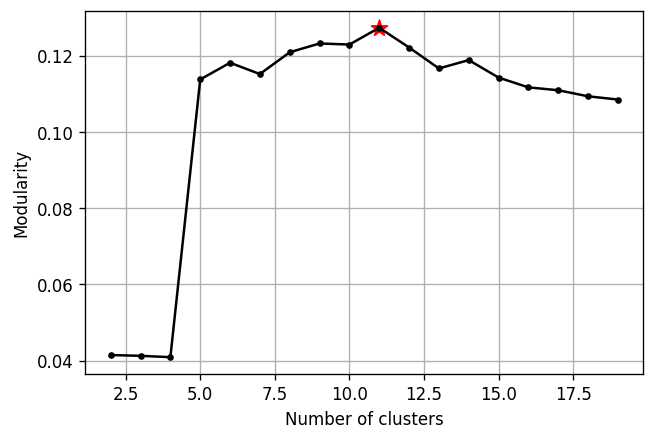

In [13]:
fig, ax = plt.subplots(dpi=120)
ax.plot(Nslices, QScores, marker=".", color="black")
idx=9
ax.scatter(Nslices[idx], QScores[idx], s=100, marker="*", color="red")
ax.set_ylabel("Modularity")
ax.set_xlabel("Number of clusters")
ax.grid(True)
#plt.plot(Nslices, Nkept)
plt.savefig("figs/Genes.61.GN.profile.pdf")

In [14]:
for cluster in xx.as_clustering(idx):
    print(nodeDF.loc[cluster, :].shape)
    print(tabulate(nodeDF.loc[cluster, :]))

(34, 2)
--  ---------------------------------------  -----------------
 0  Anterior_cingulate_area_dorsal_part      Isocortex
 1  Nucleus_accumbens                        Striatum
 2  Agranular_insular_area_posterior_part    Isocortex
 3  Agranular_insular_area_ventral_part      Isocortex
 4  Accessory_olfactory_bulb                 Olfactory_areas
 5  Anterior_olfactory_nucleus               Olfactory_areas
 7  Basolateral_amygdalar_nucleus            Amygdalar
 9  Bed_nuclei_of_the_stria_terminalis       Pallidum
13  Central_amygdalar_nucleus                Amygdalar
14  Central_lateral_nucleus_of_the_thalamus  Thalamus
15  Claustrum                                Cortical_subplate
16  Caudoputamen                             Striatum
18  Dorsal_peduncular_area                   Olfactory_areas
19  Endopiriform_nucleus_dorsal_part         Cortical_subplate
20  Endopiriform_nucleus_ventral_part        Cortical_subplate
21  Frontal_pole_cerebral_cortex             Isocortex
22  Gustato

### Community Detection

In [ ]:
yyy = g2.community_optimal_modularity()

In [ ]:
yyy

In [ ]:
Candidate_CircuitNodes = SparkMetaBias.head(50).index.values
g2 = subgraph(g, Candidate_CircuitNodes)
dat = []
for v in g2.vs:
    #print(v.index, v["label"])
    dat.append([v.index, v["label"], str2reg[v["label"]]])
nodeDF = pd.DataFrame(dat, columns=["index", "STR", "REG"])
nodeDF = nodeDF.set_index("index")
nodeDF.head(2)

#### Info Map

In [ ]:
xx = g2.community_infomap()

In [ ]:
for cluster in xx:
    print()
    print(tabulate(nodeDF.loc[cluster, :]))

####  Edge Betweeness

In [ ]:
g2.to_undirected()
xx = g2.community_edge_betweenness()
for cluster in xx.as_clustering(15):
    print(nodeDF.loc[cluster, :].shape)
    print(tabulate(nodeDF.loc[cluster, :]))

In [ ]:

Cluster_Directed = g2.community_edge_betweenness(directed=True)
Cluster_UnDirected = g2.community_edge_betweenness(directed=False)

QScores = []
Nslices = np.arange(1,40,1)
Nkept = []
for N in Nslices:
    clusters = xx.as_clustering(N)
    Kept, Dropped = CleanCluster(clusters)
    g2_kept = g2.subgraph(Kept)
    #cohe, Degree = ScoreSTRSet(g2, g2_kept.vs["label"], {}, False, False)
    #print(cohe, Degree)
    Q = g2.modularity(clusters)
    #print(N, len(Kept), Q)
    QScores.append(Q)
    Nkept.append(len(Kept))

In [ ]:
fig, ax = plt.subplots(dpi=120)
ax.plot(Nslices, QScores, marker=".", color="black")
idx=9
ax.scatter(Nslices[idx], QScores[idx], s=100, marker="*", color="red")
ax.set_ylabel("Modularity")
ax.set_xlabel("Number of clusters")
ax.grid(True)
#plt.plot(Nslices, Nkept)

In [ ]:
for cluster in xx.as_clustering(10):
    print(nodeDF.loc[cluster, :].shape)
    print(tabulate(nodeDF.loc[cluster, :]))

In [ ]:
Kept, Dropped = CleanCluster(xx.as_clustering(10))
nodeDF.loc[Kept].to_csv("dat/Circuit_GN_42.csv", index=False)
CircuitSTRs = nodeDF.loc[Kept]["STR"].values

In [ ]:
print(len(CircuitSTRs))
CircuitSTRs

In [ ]:
g3 = subgraph(g, nodeDF.loc[Kept]["STR"].values)

In [ ]:
g3_Node_DF = pd.DataFrame(data={"STR":g3.vs["label"], 
                                "Region":[str2reg[x] for x in g3.vs["label"]]})

In [ ]:
g3_Node_DF.head(3)

In [ ]:
g3.is_directed()

In [ ]:
ITRs = []
plt.style.use('seaborn-talk')
fig, ax = plt.subplots(dpi=720, figsize=(12,16), frameon=False)
for v in g3.vs:
    #print(v.indegree(), v.outdegree())
    x, y = v.indegree(), v.outdegree()
    ax.scatter(x,y)
    ax.text(x,y, s=v["label"], fontstyle="normal", fontsize=10, fontweight="semibold")
#ax.grid(True)
ax.set_xlabel("In degree", fontsize=20)
ax.set_ylabel("Out degree", fontsize=20)
ax.set_xlim(-1, 14)
ax.set_ylim(-1, 22)

for r in np.arange(4,20,4):
    phi = np.linspace(0, 1/2*np.pi, 200)
    x = r*np.cos(phi)
    y = r*np.sin(phi)
    plt.plot(x,y,'--',color="grey", )

lims = np.array([
    0,  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
])
ax.plot(lims, lims, '--', alpha=0.5, zorder=0, color="grey")
ax.plot(lims, 2*lims, '--', alpha=0.5, zorder=0, color="grey")
ax.plot(lims, 0.5*lims, '--', alpha=0.5, zorder=0, color="grey")


In [ ]:
g3_Node_DF["betweenness"] = g3.betweenness()
g3_Node_DF["closeness"] = g3.closeness()
g3_Node_DF["harmonic_centrality"] = g3.harmonic_centrality()

In [ ]:
g3_Node_DF

In [ ]:
g3_Node_DF.sort_values("harmonic_centrality", ascending=False)

In [ ]:
# Annotate Circuits
# Node: Bias, Region
# Edges: Exp dist, Cartesion dist, Cross Region (bool), 

### Let's try long distance

##### 1. Real Connectome

In [ ]:
Cartesian_distancesDF = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv",
                                   index_col=0)

In [ ]:
# Mask Mat2 according to values in Mat1
def MaskDistMat(Mat1, Mat2, cutoff, m='lt'):
    New_Mat2 = Mat2.copy(deep=True)
    for STR_i in Mat1.index.values:
        for STR_j in Mat1.columns.values:
            if m == 'gt':
                if Mat1.loc[STR_i, STR_j] >= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
            elif m == "lt":
                if Mat1.loc[STR_i, STR_j] <= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
    return New_Mat2

def MaskDistMat_xx(distance_mat, Conn_mat, cutoff, keep='gt'):
    Conn_mat_new = Conn_mat.copy(deep=True)
    distance_mat_new = distance_mat.copy(deep=True)
    for STR_i in distance_mat.index.values:
        for STR_j in distance_mat.columns.values:
            if keep == 'gt':
                if distance_mat.loc[STR_i, STR_j] >= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0
            elif keep == "lt":
                if distance_mat.loc[STR_i, STR_j] <= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0                
    return Conn_mat_new, distance_mat_new

In [ ]:
Cartesian_distances_w_edge = MaskDistMat(adj_mat, Cartesian_distancesDF, cutoff=0)

In [ ]:
CD_values = [x for x in Cartesian_distances_w_edge.values.flatten() if x > 0]
CD_deciles = np.percentile(CD_values, np.arange(0, 100, 10))
plt.hist(CD_values)
plt.show()
print(np.mean(CD_values))

In [ ]:
CD_deciles

In [ ]:
Distance_Cuts = [0, 1000, 2000, 3000, 4000, 5000, 6000]

In [ ]:
Dist_cut_graphs = []
#for i in range(10):
N_Connections_total = []
for cut in Distance_Cuts:
    #Conn_mat_new, distance_mat_new = MaskDistMat_xx(Cartesian_distances_w_edge, adj_mat, 
    #                                            cutoff=Cartesian_distances_deciles[i])
    Conn_mat_new, distance_mat_new = MaskDistMat_xx(Cartesian_distances_w_edge, adj_mat, 
                                                cutoff=cut)
    N_Connections_total.append(np.count_nonzero(Conn_mat_new))
    g_ = LoadConnectome2(Conn_mat_new)
    Dist_cut_graphs.append(g_)

In [ ]:
#Sib_Bias_avgz = pd.read_csv("dat/bias2/ASD_LGD_Dmis2_spec.bias.csv", index_col="STR")
#SparkMetaBias = pd.read_csv("dat/Jon_data/Spark_Final_ExpBias.csv")
ASD_STRs = SparkMetaBias.head(49).index.values
Sib_STRs = Sib_Bias_avgz.head(49).index.values
ASD_top49_conn, Sib_top49_conn = [], []
N_Connections_total = []
for i,v in enumerate(Dist_cut_graphs):
    g_ = Dist_cut_graphs[i]
    N_Connections_total.append(len(g_.es))
    cohe, Nconn = ScoreSTRSet(g_, ASD_STRs, EdgeWeightsDict)
    ASD_top49_conn.append(Nconn)
    cohe, Nconn = ScoreSTRSet(g_, Sib_STRs, EdgeWeightsDict)
    Sib_top49_conn.append(Nconn)
ASD_top49_conn = np.array(ASD_top49_conn)
Sib_top49_conn = np.array(Sib_top49_conn)
N_Connections_total = np.array(N_Connections_total)

In [ ]:
g2_asd_49 = subgraph(g, ASD_STRs)
g2_sib_49 = subgraph(g, Sib_STRs)
bl_asd = len(g2_asd_49.es)/np.count_nonzero(adj_mat)
bl_sib = len(g2_sib_49.es)/np.count_nonzero(adj_mat)

In [ ]:
dat_asd/bl_asd

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=120, figsize=(8,4))
dat_asd = ASD_top49_conn/N_Connections_total
dat_sib = Sib_top49_conn/N_Connections_total
ax1.plot(Distance_Cuts, dat_asd/bl_asd, marker=".", label="ASD")
ax1.plot(Distance_Cuts, dat_sib/bl_sib, marker=".", label="Sib")
ax1.grid(True)
ax1.legend()
ax1.set_ylabel("Connections Enrichment")
ax1.set_xlabel("Distance Deciles")

ax2.plot(Distance_Cuts, dat_asd/dat_sib, marker=".")
ax2.grid(True)
ax2.set_ylabel("ASD/Sib Ratio")
ax2.set_xlabel("Distance Deciles")
fig.savefig("figs/CartesianDistDecile.pdf")

##### 2. permuted connectome

In [ ]:
for i in range(5):
    adj_permut = pd.read_csv("dat/permut_connectome/{}.csv".format(i), index_col=0)
    CD_w_edge_permut = MaskDistMat(adj_permut, Cartesian_distancesDF, cutoff=0)
    CD_values = [x for x in CD_w_edge_permut.values.flatten() if x > 0]
    CD_deciles = np.percentile(CD_values, np.arange(0, 100, 10))
    plt.hist(CD_values)
    plt.show()
    print(np.mean(CD_values))

### Neg bias genes

In [ ]:
Zsco

#### Other

In [ ]:
g2.to_undirected()
xx = g2.community_spinglass()
for cluster in xx:
    print()
    print(tabulate(nodeDF.loc[cluster, :]))

In [ ]:
g2.to_undirected()
xx = g2.community_walktrap()
for cluster in xx.as_clustering():
    print()
    print(tabulate(nodeDF.loc[cluster, :]))

### DEV SA with fixed size



#### test

In [ ]:
N_size = 30
CandidateNodes = SparkMetaBias.head(50).index.values
Init_States = np.ones(len(CandidateNodes))
for idx in range(len(Init_States)):
    if idx > N_size-1:
        Init_States[idx] = 0
ins = MostCohesiveCirtuisGivenNCandidates(Init_States, g, CandidateNodes, EdgeWeightsDict, Weighted=False, Direction=False)

In [ ]:
ins.copy_strategy = "deepcopy"
ins.Tmax=1e-2
ins.Tmin=1e-5
Tmps, Energys, state, e = ins.anneal()
print("Done")

In [ ]:
InCirtuitNodes = ins.CandidateNodes[np.where(ins.state==1)[0]]
print(1-e, len(InCirtuitNodes))
RegionDistributionsList(InCirtuitNodes)

In [ ]:
InCirtuitNodes = ins.CandidateNodes[np.where(ins.state==1)[0]]
print(1-e, len(InCirtuitNodes))
RegionDistributionsList(InCirtuitNodes)

In [ ]:
InCirtuitNodes = ins.CandidateNodes[np.where(ins.state==1)[0]]
print(1-e, len(InCirtuitNodes))
RegionDistributionsList(InCirtuitNodes)

#### Load

In [ ]:
real_SA = pd.read_csv("dat/SA.Real/real.w.50.csv")

In [ ]:
STRs = real_SA.columns.values
xx, yy = [], []
for i, row in real_SA.iterrows():
    state = row.values
    InCirtuitNodes = STRs[np.where(state==1)[0]] 
    score, x = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=True, Direction=False)
    print(sum(state), score)
    xx.append(sum(state))
    yy.append(score)

In [ ]:
plt.plot(xx, yy)

### XX

In [ ]:
Candidate_CircuitNodes = SparkMetaBias.head(49).index.values
g2 = subgraph(g, Candidate_CircuitNodes)
real_graph_size, real_stats, real_graphs, real_trimmed_vs = CircuitTrimming(g2, g2, {})

In [ ]:
idx = 16
print(len(real_graphs[idx].vs))
RegionDistributionsList(real_graphs[idx].vs['label'])

In [ ]:
for i, (x, y) in enumerate(zip(real_stats, real_trimmed_vs)):
    print(i, 49-i, x,y["label"])

In [ ]:
All_perm_stats = []
for i in range(1000):
    print(i)
    g_perm = Permutated_Graphs[i]
    g2_perm = subgraph(g_perm, Candidate_CircuitNodes)
    perm_graph_size, perm_stats, perm_graphs, perm_trimmed_vs = CircuitTrimming(g2_perm, g2_perm, {})
    perm_stats = np.array(perm_stats)
    All_perm_stats.append(perm_stats)
All_perm_stats = np.array(All_perm_stats)

In [ ]:
len(real_stats), All_perm_stats.shape

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), dpi=240)
Ratios = []
for i, N_size in enumerate(range(49, 2, -1)):
    ratio = real_stats[i]/np.mean(All_perm_stats[:, i])
    #print(N_size, ratio)
    ax1.vlines(N_size, min(All_perm_stats[:, i]), max(All_perm_stats[:, i]), color = "blue", lw=1)
    ax1.scatter(N_size, real_stats[i], color="black")
    ax1.scatter(N_size, np.mean(All_perm_stats[:, i]), color="blue")
    Ratios.append(ratio)
ax2.plot(range(49, 2, -1), Ratios, marker=".", color="black")
ax1.invert_xaxis()
ax2.invert_xaxis()
ax1.set_ylabel("Cohesivness")
ax2.set_ylabel("Cohesivness Ratio")
ax1.grid(True)
ax2.grid(True)

### Trimming with fixed size and normlize with boostraped

In [ ]:
# Preload permutated Graph
Permutated_Graphs = []
for i in range(1000):
    adj_mat_perm = pd.read_csv("dat/permut_connectome/{}.csv".format(i), index_col=0)
    g_perm = LoadConnectome2(adj_mat_perm)
    Permutated_Graphs.append(g_perm)

In [ ]:
# Real Connectome
Candidate_CircuitNodes = SparkMetaBias.head(50).index.values
g2 = subgraph(g, Candidate_CircuitNodes)
real_graph_size, real_stats, real_graphs, real_trimmed_vs = CircuitTrimming(g2, g, {})

In [ ]:
g2.transitivity_undirected()

In [ ]:
real_stats

In [ ]:
All_perm_stats = []
for i in range(1000):
    print(i)
    g_perm = Permutated_Graphs[i]
    g2_perm = subgraph(g_perm, Candidate_CircuitNodes)
    perm_graph_size, perm_stats, perm_graphs, perm_trimmed_vs = CircuitTrimming(g2_perm, g_perm, {})
    perm_stats = np.array(perm_stats)
    All_perm_stats.append(perm_stats)
All_perm_stats = np.array(All_perm_stats)

In [ ]:
All_perm_stats.shape

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), dpi=240)
Ratios = []
for i, N_size in enumerate(range(50, 10, -1)):
    ratio = real_stats[i]/np.mean(All_perm_stats[:, i])
    #print(N_size, ratio)
    ax1.vlines(N_size, min(All_perm_stats[:, i]), max(All_perm_stats[:, i]), color = "blue", lw=1)
    ax1.scatter(N_size, real_stats[i], color="black")
    ax1.scatter(N_size, np.mean(All_perm_stats[:, i]), color="blue")
    Ratios.append(ratio)
ax2.plot(range(50, 10, -1), Ratios, marker=".", color="black")
ax1.invert_xaxis()
ax2.invert_xaxis()
ax1.set_ylabel("Cohesivness")
ax2.set_ylabel("Cohesivness Ratio")

In [ ]:
XXX = real_graphs[idx].vs["label"] + ["Caudoputamen", "Nucleus_accumbens"]

In [ ]:
ScoreSTRSet(g, real_graphs[idx].vs["label"], {},)

In [ ]:
ScoreSTRSet(g, XXX, {},)

In [ ]:
RegionDistributionsList(SparkMetaBias.head(50).index.values)

In [ ]:
# real_graph_size, real_stats, real_graphs, real_trimmed_vs
idx = 26
print(real_graph_size[idx])
RegionDistributionsList(real_graphs[idx].vs["label"])

In [ ]:
for idx, v in zip(real_graph_size, real_trimmed_vs):
    print(idx, v['label'])

In [ ]:
dat = []
for idx, v in zip(real_graph_size, real_trimmed_vs):
    print(idx, v['label'], SparkMetaBias.loc[v["label"], "EFFECT"])
    dat.append(SparkMetaBias.loc[v["label"], "EFFECT"])

In [ ]:
plt.plot(range(40), dat)

### Triming Connectivity

In [ ]:
Candidate_CircuitNodes = SparkMetaBias.head(50).index.values
g2 = subgraph(g, Candidate_CircuitNodes)
real_graph_size, real_stats, real_graphs, real_trimmed_vs = CircuitTrimming(g2, g, {})

In [ ]:
plt.plot(range(40), real_stats)

In [ ]:
real_trimmed_vs

### Circuit Trimming With Cohesivness Effect Size (normlize with N)

In [ ]:
# Preload permutated Graph
Permutated_Graphs = []
for i in range(1000):
    adj_mat_perm = pd.read_csv("dat/permut_connectome/{}.csv".format(i), index_col=0)
    g_perm = LoadConnectome2(adj_mat_perm)
    Permutated_Graphs.append(g_perm)

In [ ]:
# Functions
def GreedyTrim(DF, topN, graph, perm_graphs):
    opt_stats, graphs, trimmed_Vs = [], [], [] 
    CircuitNodes = DF.head(topN).index.values
    for i in range(topN, 1, -1):
        CircuitNodes, stat, trimmed_v, p = argmax_optimize_stat(CircuitNodes, graph, perm_graphs)
        graphs.append(CircuitNodes)
        opt_stats.append(stat)
        trimmed_Vs.append(trimmed_v)
        
        #print(i, stat, trimmed_v)
        yield i, stat, trimmed_v, p
    #idx = np.argmax(exp_stats)
    #circuit_STRs = graphs[idx]
    #cohe_norm = exp_stats[idx]
    #return circuit_STRs, exp_stats[idx], trimmed_Vs
        
def argmax_optimize_stat(CircuitNodes, graph, perm_graphs):
    opt_stats, CandidateCircuitGroup, vs, Pvalues = [], [], [], []
    # Cohesivness of Real Graoh
    for i, v in enumerate(CircuitNodes):
        Candidate_CircuitNodes = list(copy.deepcopy(CircuitNodes))
        Candidate_CircuitNodes.remove(v)
        tmp_graph = subgraph(graph, Candidate_CircuitNodes)
        #stat = CohesiveAVG(graph, tmp_graph)
        stat = tmp_graph.transitivity_undirected()
        stat_perms = []
        for g_perm in perm_graphs:
            tmp_graph_perm = subgraph(g_perm, Candidate_CircuitNodes)
            #stat_perm = CohesiveAVG(g_perm, tmp_graph_perm)
            stat_perm = tmp_graph_perm.transitivity_undirected()
            stat_perms.append(stat_perm)
        norm_cohe = stat/np.mean(stat_perms)
        opt_stats.append(norm_cohe)
        CandidateCircuitGroup.append(Candidate_CircuitNodes)
        vs.append(v)
        #print(norm_cohe, v)
        Z, P = GetPermutationP(stat_perms, stat)
        Pvalues.append(P)
        
    idx = np.argmax(opt_stats)
    trimmed_v = vs[idx]
    max_norm_cohe = opt_stats[idx]
    P = Pvalues[idx]
    return CandidateCircuitGroup[idx], max_norm_cohe, trimmed_v, P
        
def CohesiveAVG(completeGraph, subGraph):
    cohesives = []
    CandidateNodes = set(subGraph.vs["label"])
    for v in completeGraph.vs:
        if v['label'] in CandidateNodes:
            coh, _ = CohesivenessSingleNodeMaxInOut2(completeGraph, subGraph, v, {}, weighted=False)
            cohesives.append(coh)
    return np.mean(cohesives)

In [ ]:
#circuit_STRs, exp_stats[idx], removed = GreedyTrim(SparkMetaBias, 50, g, Permutated_Graphs)
AA, BB = [], []
for i, stat, trimmed_v, p in GreedyTrim(SparkMetaBias, 50, g, Permutated_Graphs):
    print(i, stat, trimmed_v, p)
    AA.append(stat)
    BB.append(trimmed_v)

In [ ]:
plt.plot(range(49), AA)

### Trimming with fixed size and normlize with boostraped

In [ ]:
# Functions
def GreedyTrim(DF, topN, graph, perm_graphs):
    opt_stats, graphs, trimmed_Vs = [], [], [] 
    CircuitNodes = DF.head(topN).index.values
    for i in range(topN, 2, -1):
        CircuitNodes, stat, trimmed_v, p = argmax_optimize_stat(CircuitNodes, graph, perm_graphs)
        graphs.append(CircuitNodes)
        opt_stats.append(stat)
        trimmed_Vs.append(trimmed_v)
        
        yield i, stat, trimmed_v, p
        
def argmax_optimize_stat_at_sizeN(CircuitNodes, graph, perm_graphs):
    opt_stats, CandidateCircuitGroup, vs, Pvalues = [], [], [], []
    # Cohesivness of Real Graoh
    for i, v in enumerate(CircuitNodes):
        Candidate_CircuitNodes = list(copy.deepcopy(CircuitNodes))
        Candidate_CircuitNodes.remove(v)
        tmp_graph = subgraph(graph, Candidate_CircuitNodes)
        stat = CohesiveAVG(graph, tmp_graph)
        stat_perms = []
        for g_perm in perm_graphs:
            tmp_graph_perm = subgraph(g_perm, Candidate_CircuitNodes)
            stat_perm = CohesiveAVG(g_perm, tmp_graph_perm)
            stat_perms.append(stat_perm)
        norm_cohe = stat/np.mean(stat_perms)
        opt_stats.append(norm_cohe)
        CandidateCircuitGroup.append(Candidate_CircuitNodes)
        vs.append(v)
        #print(norm_cohe, v)
        Z, P = GetPermutationP(stat_perms, stat)
        Pvalues.append(P)
        
    idx = np.argmax(opt_stats)
    trimmed_v = vs[idx]
    max_norm_cohe = opt_stats[idx]
    P = Pvalues[idx]
    return CandidateCircuitGroup[idx], max_norm_cohe, trimmed_v, P
        
def CohesiveAVG(completeGraph, subGraph):
    cohesives = []
    CandidateNodes = set(subGraph.vs["label"])
    for v in completeGraph.vs:
        if v['label'] in CandidateNodes:
            coh, _ = CohesivenessSingleNodeMaxInOut2(completeGraph, subGraph, v, {}, weighted=False)
            cohesives.append(coh)
    return np.mean(cohesives)